In [22]:
# importing all the essential libraries and modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import multiprocessing as mp
import math
from sklearn.decomposition import PCA
import random

In [23]:
# reading the final dataset
data=pd.read_csv('dataset/merged.csv',low_memory=False)

In [24]:
# columns that are needed to be converted


column_type=['Pressure_dbar',
             'Temperature_Celcius',
             'salinity_pss',
             'Sigma_theta_kg_m_pow_minus_3',
             'depth_m',
             'oxygen_mu_molkg_pow_minus_1',
             'oxygen_saturation_percentage',
             'nitrate_mu_mol_kg_pow_minus_1',
             'chl_a_mg_m_pow_minus_3',
             'b_bp700_m_pow_minus_1',
             'POC_milli_mol_m_pow_minus_3',
             'pH_insitu_total','pH_25C_total',
             'TALK_micro_mol_kg_pow_minus_1',
             'DIC_micro_mol_kg_pow_minus_1',
             'pCO2_micro_atm','b_bp532_m_pow_minus_1',
             'CDOM_ppb']

In [25]:
# action for column conversion from object to float

for col in column_type:
    data[col]=data[col].astype(float)

In [26]:
# droppoing mbariID column as it contains only 1 value

data.drop(['mbariID'],axis=1,inplace=True)

In [27]:
data.drop(['Type',
           'pressure_QF',
           'temperature_QF',
           'b_bp532_m_pow_minus_1',
           'b_bp532_QF',
          'oxygen_saturation_percentage'],axis=1,inplace=True)

In [28]:
# columns which are having invalid values mixed with valid values

col_list= ["chl_a_mg_m_pow_minus_3" ,
    "b_bp700_m_pow_minus_1" , 
    "POC_milli_mol_m_pow_minus_3" , 
    "pH_insitu_total" , "pH_25C_total" , 
    "TALK_micro_mol_kg_pow_minus_1" , 
    "DIC_micro_mol_kg_pow_minus_1" , 
    "pCO2_micro_atm" , 
    "CDOM_ppb",
    "oxygen_mu_molkg_pow_minus_1",
    "nitrate_mu_mol_kg_pow_minus_1"]
# print(len(col_list))

In [29]:
# val dataframe is the one that would be worked on, 

val=data

In [30]:
# nitrate_mu_mol_kg_pow_minus_1 > 0 only available


val=val[val['nitrate_mu_mol_kg_pow_minus_1']>0]

In [31]:
# dropping all the rows that are having invalid values for some features

for i in col_list:
    val=val[val[i]!=-10000000000.0]
print("after dropping rows, the shape of new dataframe: ",val.shape)
# print("shape of previous dataframe: ",data.shape)
# print("percentage of dropped data: ",((data.shape[0]-val.shape[0])/data.shape[0])*100,"%")

after dropping rows, the shape of new dataframe:  (13631, 38)


In [32]:
col_list=['FloatID', 
          'Station', 
          'longitude_degrees_east',
          'latitude_degrees_north', 
          'latitude_QF', 
          'Pressure_dbar',
          'Temperature_Celcius', 
          'salinity_pss', 
          'salinity_QF',
          'Sigma_theta_kg_m_pow_minus_3', 
          'sigma_theta_QF', 
          'depth_m', 
          'depth_QF',
          'oxygen_mu_molkg_pow_minus_1', 
          'oxygen_QF', 
          'oxygen_saturation_QF',
          'nitrate_mu_mol_kg_pow_minus_1', 
          'nitrate_QF', 
          'chl_a_mg_m_pow_minus_3',
          'chl_a_QF', 
          'b_bp700_m_pow_minus_1', 
          'b_bp700_QF',
          'POC_milli_mol_m_pow_minus_3', 
          'POC_QF', 
          'pH_insitu_total',
          'pH_insitu_QF', 
          'pH_25C_total', 
          'pH_25C_QF',
          'TALK_micro_mol_kg_pow_minus_1', 
          'TALK_QF',
          'DIC_micro_mol_kg_pow_minus_1', 
          'DIC_QF', 
          'pCO2_micro_atm', 
          'pCO2_QF',
          'CDOM_ppb', 
          'CDOM_QF']

In [33]:
# dropping some columns again, but don't know why!!!
val.drop(['region','latitude_QF','salinity_QF','sigma_theta_QF','depth_QF','time','nitrate_QF','chl_a_QF',
         'b_bp700_QF','POC_QF','pH_insitu_QF','pH_25C_QF','TALK_QF','DIC_QF','pCO2_QF','CDOM_QF','oxygen_QF',
         'oxygen_saturation_QF'],axis=1,inplace=True)

In [34]:
# pearson correlation coefficient

cor=val.corr(method="pearson")

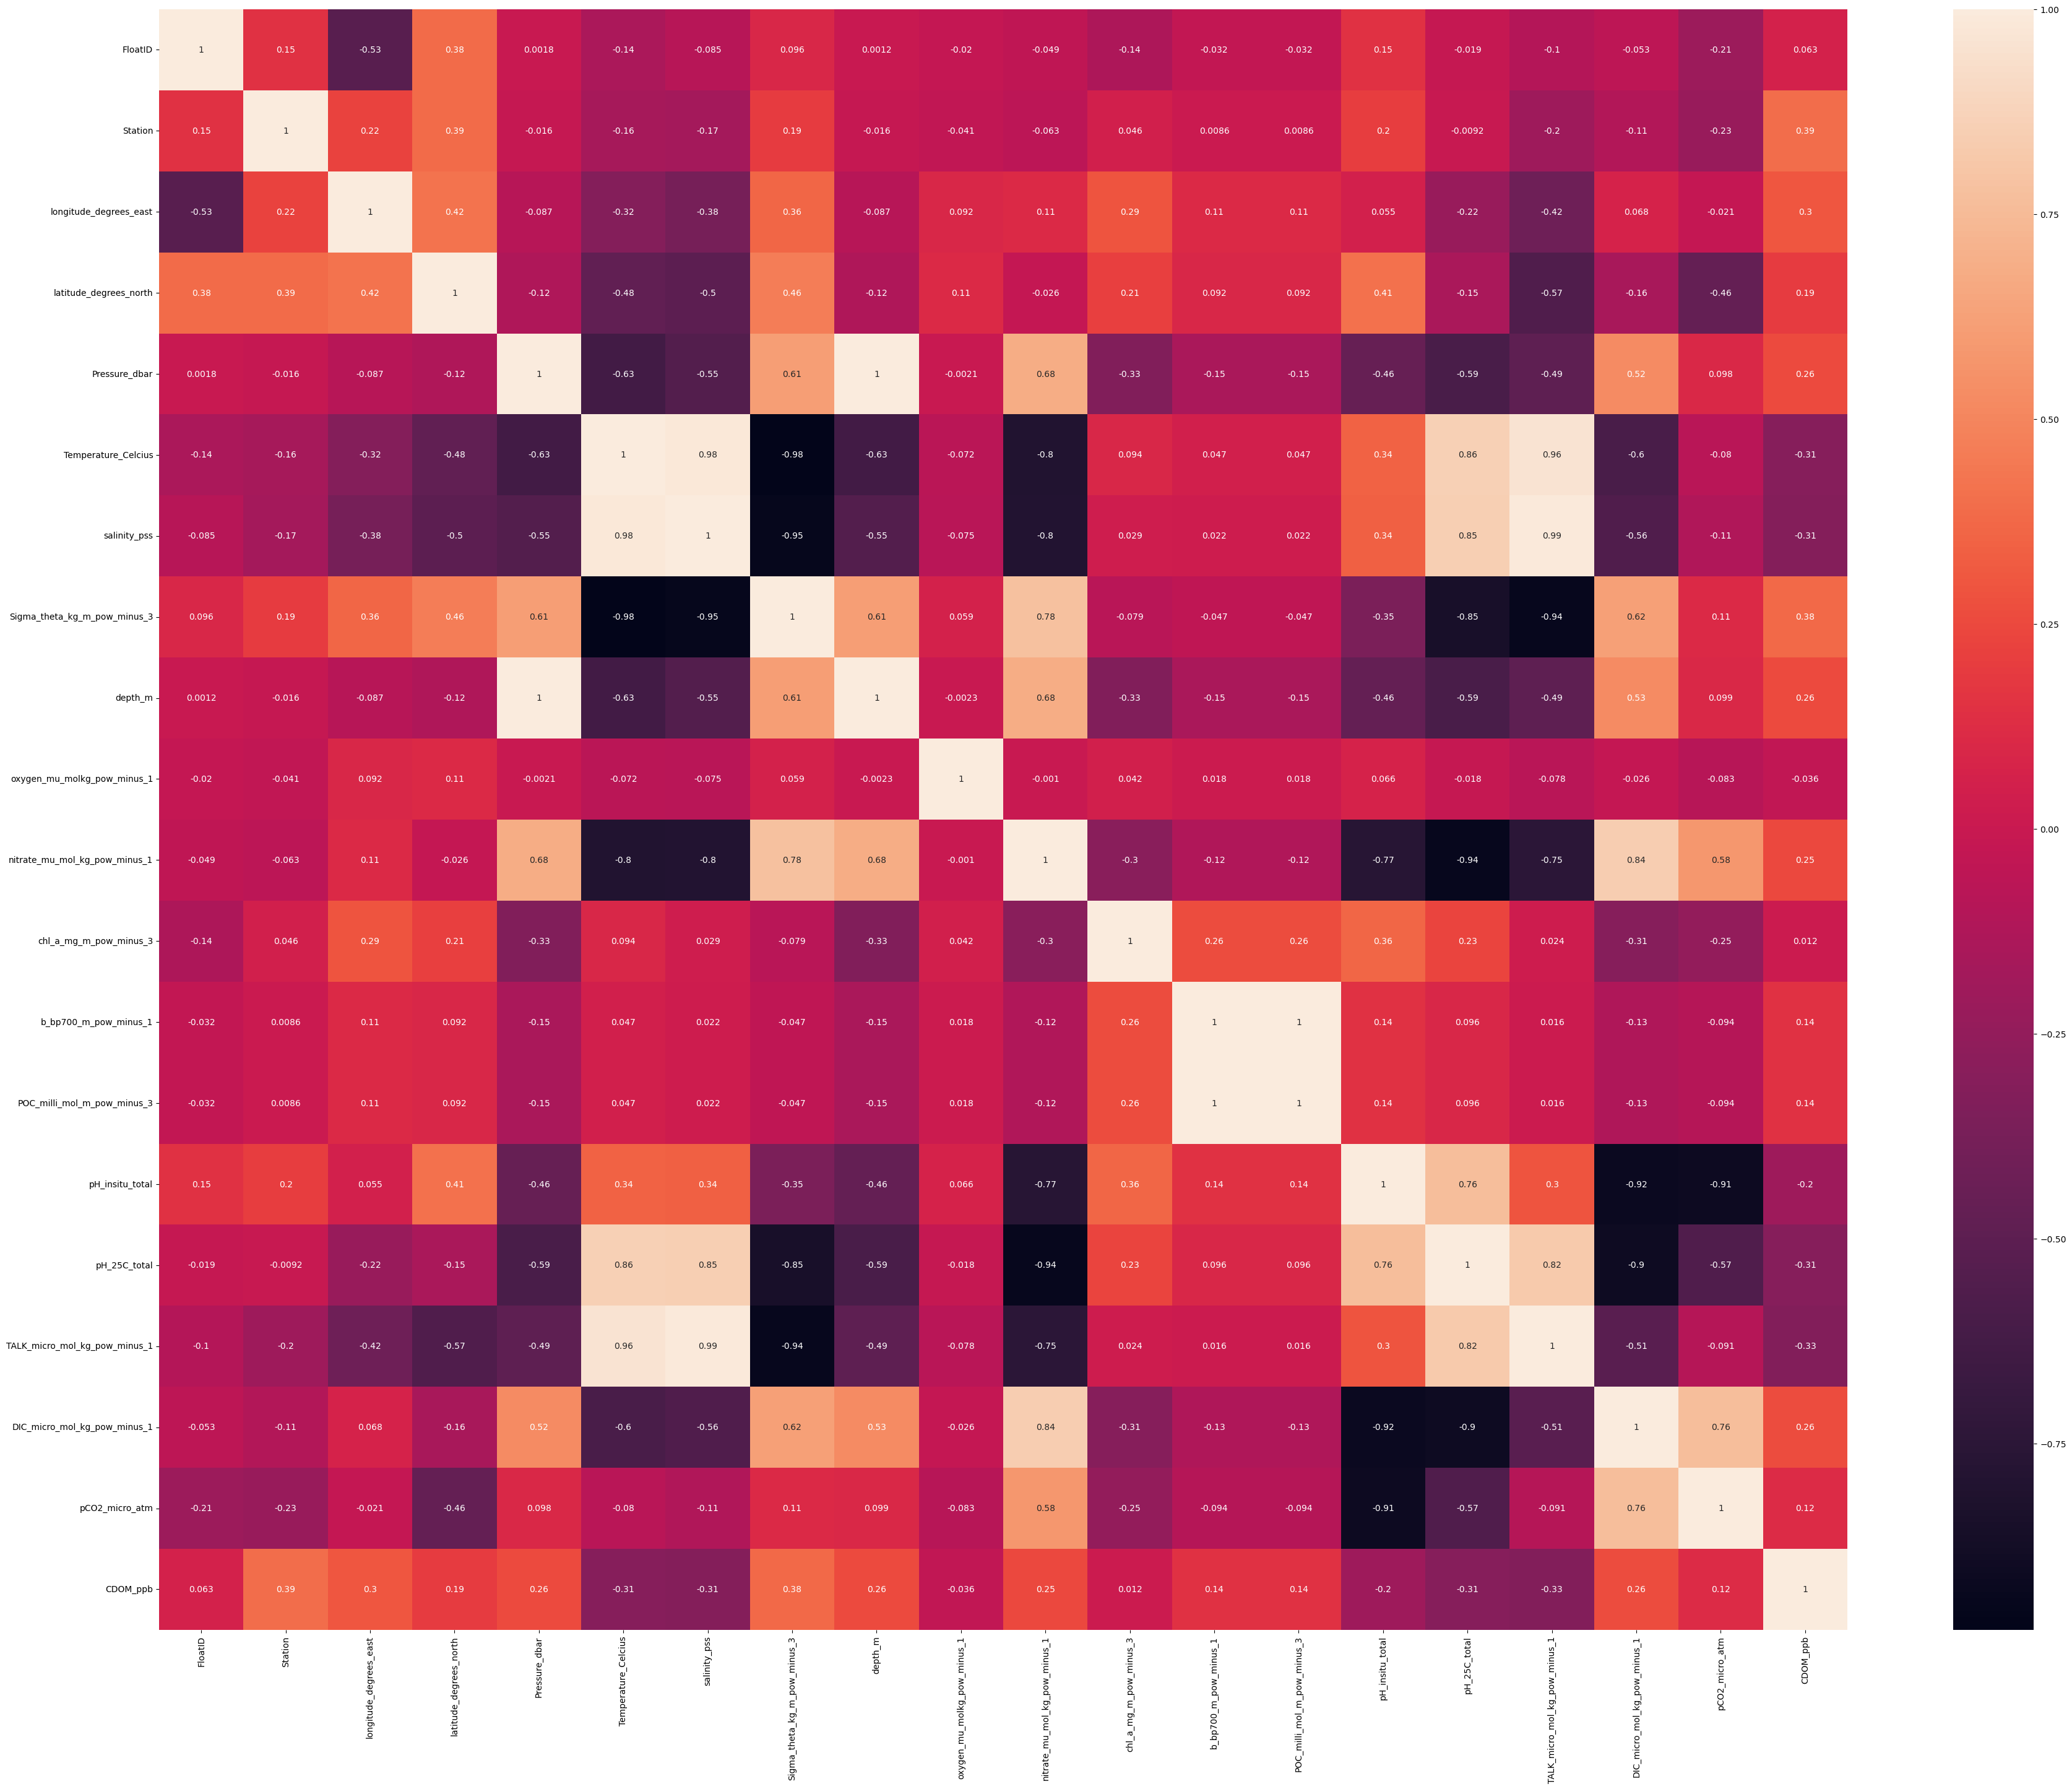

In [35]:
fig, ax = plt.subplots(figsize = (44, 34))
sns.heatmap(cor,annot=True)
plt.show()

In [36]:
# sum of all the correlation co efficient for all columns
# low correlation coefficient has been considered, please take it into account in future

div=val.shape[1]-1
cor_list=[]
cor_col=cor.columns
for i in cor_col:
    sm=0
    for j in cor[i]:
        sm+=abs(j)
    #print("abs value for ",i," is ",sm)
    cor_list.append((i,(sm/div)*100))
cor_list.sort(key=lambda i:i[1], reverse= True)

for i in cor_list:
    print(i)

('pH_25C_total', 52.09728825611904)
('nitrate_mu_mol_kg_pow_minus_1', 50.735367864199546)
('Sigma_theta_kg_m_pow_minus_3', 50.17402386517139)
('Temperature_Celcius', 50.1271119992348)
('salinity_pss', 48.74706960048199)
('TALK_micro_mol_kg_pow_minus_1', 47.818979266293745)
('DIC_micro_mol_kg_pow_minus_1', 47.437384169892546)
('pH_insitu_total', 43.90757766936304)
('depth_m', 40.789291352013194)
('Pressure_dbar', 40.75759489133282)
('latitude_degrees_north', 33.309290312684844)
('pCO2_micro_atm', 31.360778367843988)
('CDOM_ppb', 27.654531634856873)
('longitude_degrees_east', 27.28553098597369)
('chl_a_mg_m_pow_minus_3', 24.161402225221185)
('POC_milli_mol_m_pow_minus_3', 19.330288508240177)
('b_bp700_m_pow_minus_1', 19.329660373755193)
('Station', 19.053397837277988)
('FloatID', 17.031974396664886)
('oxygen_mu_molkg_pow_minus_1', 9.779616642697068)


In [37]:
# def gaussianKernel(U,V,sigma):
#         return np.exp((-1/(2*(sigma*sigma)))*(np.sum(np.power((U-V),2))))
# def gram(U,V,sigma=0.1):
#     G = np.zeros((U.shape[0], V.shape[0]))
#     for i in range(0,U.shape[0]):
#         for j in range(0,V.shape[0]):
#             G[i][j] = gaussianKernel(U[i],V[j],sigma)
#     return G


# def RBF(x_train1,y_train1,x_test1,y_test):


#     RBF_regressor=SVR(kernel = "precomputed")
#     y_train1=y_train1.ravel()
#     RBF_regressor.fit(gram(x_train1,x_train1,0.2),y_train1)
#     y_pred=RBF_regressor.predict(gram(x_test1,x_train1))
#     y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
#     y_pred=sc_y.inverse_transform(y_pred)


#     # evaluating the model
#     # mse
#     print("MSE:", mean_squared_error(y_test, y_pred))
#     # RMSE
#     print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
#     # r2 score
#     r2 = r2_score(y_test,y_pred)
#     print("r2 value: ",r2)
#     # adjusted r2 score
#     n=y_test.shape[0]       # n=number of observations
#     k=x_train.shape[1]-1      # k=number of predictor variables
#     adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
#     print("adjusted r2 value: ",adj_r2_score)

In [38]:
# train,test = train_test_split(val,
#                               random_state=random.randint(0,10000000),
#                               test_size=0.1,
#                             train_size=0.45)
    
# # predicting ph

# # training data
# x_train=train.drop(['pH_25C_total'],axis=1)
# y_train=train['pH_25C_total']
# #test data
# x_test=test.drop(['pH_25C_total'],axis=1)
# y_test=test['pH_25C_total']


# # converting target column on both test and training set into frame

# y_test=y_test.to_frame()
# y_train=y_train.to_frame()

# # initiating the scaling instances

# sc_x=StandardScaler()
# sc_y=StandardScaler()

# # fitting the training and testing data to the scaling instances
# x_train1=sc_x.fit_transform(x_train)
# y_train1=sc_y.fit_transform(y_train)
# x_test1=sc_x.fit_transform(x_test)

# RBF(x_train1,y_train1,x_test1,y_test)


In [39]:
## custom linear kernel

def Kernel(U,V,sigma):
    return sigma*np.sum(U)*np.sum(V)
def Lineargram(U,V,sigma=0.1):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel(U[i],V[j],sigma)
    return G


def LinearRegressor(x_train1,y_train1,x_test1,y_test,sigma):
    Linear_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    Linear_regressor.fit(Lineargram(x_train1,x_train1,sigma),y_train1)
    y_pred=Linear_regressor.predict(Lineargram(x_test1,x_train1,sigma))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)


    # evaluating the model
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    # print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    # print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return list([-1])

In [40]:
cnt=0
it=1
r2_list=[]
adj_r2_score_list=[]
mse_list=[]
rmse_list=[]

while(cnt<10):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.01,
                                train_size=0.1)
        
    # predicting ph

    # training data
    x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_train=train['nitrate_mu_mol_kg_pow_minus_1']
    #test data
    x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_test=test['nitrate_mu_mol_kg_pow_minus_1']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print(it,"-th iterations")
    val1=LinearRegressor(x_train1,y_train1,x_test1,y_test,0.6)
    if(val1[0]!=-1):
        mse_list.append(val1[0])
        rmse_list.append(val1[1])
        r2_list.append(val1[2])
        adj_r2_score_list.append(val1[3])
        print(f'adjusted r-squared: {val1[3]}')
        cnt+=1
        print("Total ",cnt," number of records found yet!")
    it+=1

1 -th iterations


KeyboardInterrupt: 

In [ ]:
print(sum(rmse_list)/len(rmse_list))
print(sum(adj_r2_score_list)/len(adj_r2_score_list))

7.931663535814799
0.029671259287496542


In [ ]:
for i in range(len(r2_list)):
    print(mse_list[i],rmse_list[i],r2_list[i],adj_r2_score_list[i],)

0.015377298945767628 0.12400523757393325 0.19324177256409192 0.06222975272407261
0.015143217224580875 0.123057780024592 0.15787598918104462 0.021120807936940822
0.015265368122623118 0.12355309839345639 0.18354227531739975 0.05095512344586639
0.014996381031596989 0.1224597118712803 0.15928445349631548 0.022757997226486415
0.014347773563839669 0.11978219218164138 0.20631856483574773 0.07743012664668114
0.01494877929512352 0.1222652006710148 0.14589165484871713 0.007190299653209609
0.014807807419070163 0.1216873346699243 0.15410346466180225 0.016735651230812776
0.01602051140743991 0.12657215889539022 0.17187983738310975 0.037398785334213036
0.01584914377940096 0.12589338258781102 0.16149451837950812 0.02532696153515468
0.013074961467835305 0.11434579777077646 0.19048356224987784 0.059023627914387866


In [ ]:
# linear kernel based SVR called, and the model fitted to the training data
# pre-built function
# we may need it
train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.1,
                            train_size=0.9)
    
# predicting ph

# training data
x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
y_train=train['nitrate_mu_mol_kg_pow_minus_1']
#test data
x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
y_test=test['nitrate_mu_mol_kg_pow_minus_1']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)



regressor=SVR(kernel='linear')
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)


# predicting based on test data


# prediction function
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)


# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 2.5143544185419913
RMSE: 1.5856715985796022
r2 value:  0.9654517823845415
adjusted r2 value:  0.9649633775224182


In [ ]:
# degree 2 is better, and by default is 3
# testing on poly kernel, degree parameter for ph25C
# degree = 5

for i in [1,2,3,4,5,6]:
    train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.1,
                            train_size=0.4)
    
    # predicting ph

    # training data
    x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_train=train['nitrate_mu_mol_kg_pow_minus_1']
    #test data
    x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_test=test['nitrate_mu_mol_kg_pow_minus_1']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)


    
    
    print("degree is: ",i)
    regressor=SVR(kernel='poly',degree=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

degree is:  1
RMSE: 1.1951044140947507
adjusted r2 value:  0.9803465655431228
degree is:  2
RMSE: 2.039661265069069
adjusted r2 value:  0.9413238082512976
degree is:  3
RMSE: 0.999526909604182
adjusted r2 value:  0.9856621175762504
degree is:  4
RMSE: 2.134346208490206
adjusted r2 value:  0.9386635548279466
degree is:  5
RMSE: 8.332523644912609
adjusted r2 value:  0.05586621412624293
degree is:  6
RMSE: 35.8619118310818
adjusted r2 value:  -16.600138841995545


In [ ]:
# lesser coef0 is better, and 0.4 is good!!!!
## testing on poly, coef parameter for ph25C

for i in [0,1,2,3,4,5,6]:
    train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.1,
                            train_size=0.5)
    
    # predicting ph

    # training data
    x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_train=train['nitrate_mu_mol_kg_pow_minus_1']
    #test data
    x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_test=test['nitrate_mu_mol_kg_pow_minus_1']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    
    print("coef0 is: ",i)
    regressor=SVR(kernel='poly',coef0=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

coef0 is:  0
RMSE: 1.6826753760988848
adjusted r2 value:  0.9611518081876816
coef0 is:  1
RMSE: 0.5352424721405562
adjusted r2 value:  0.9961789972559855
coef0 is:  2
RMSE: 0.7695948688225953
adjusted r2 value:  0.9917566338993926
coef0 is:  3
RMSE: 0.6337796156695346
adjusted r2 value:  0.9946208111924177
coef0 is:  4
RMSE: 1.1468100508712564
adjusted r2 value:  0.982545013386621
coef0 is:  5
RMSE: 0.9516274127617248
adjusted r2 value:  0.9879545936058711
coef0 is:  6
RMSE: 0.9876720762139126
adjusted r2 value:  0.9861746189534524


In [ ]:
## final params for poly kernel for ph25C
train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.2,
                            train_size=0.8)
    
# predicting ph

# training data
x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
y_train=train['nitrate_mu_mol_kg_pow_minus_1']
#test data
x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
y_test=test['nitrate_mu_mol_kg_pow_minus_1']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)


regressor=SVR(kernel='poly',degree=5,coef0=)
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
# mse
print("MSE:", mean_squared_error(y_test, y_pred))

# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)


# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 56405.034272728626
RMSE: 237.4974405603745
r2 value:  -0.08156495589866442
adjusted r2 value:  -0.08915628732166936


In [ ]:
## better prediction for C=4
## it's on RBF, C params


for i in [0.0007,0.001,0.03,0.005,0.008]:
    train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.1,
                            train_size=0.5)
    
    # predicting ph

    # training data
    x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_train=train['nitrate_mu_mol_kg_pow_minus_1']
    #test data
    x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_test=test['nitrate_mu_mol_kg_pow_minus_1']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)




    print("C is: ",i)
    regressor=SVR(C=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

C is:  0.0007
RMSE: 4.809067489720547
adjusted r2 value:  0.6880795715239701
C is:  0.001
RMSE: 3.8141383257767014
adjusted r2 value:  0.7895357991908967
C is:  0.03
RMSE: 1.1163054708036897
adjusted r2 value:  0.9821005060956751
C is:  0.005
RMSE: 1.746172972906751
adjusted r2 value:  0.9599495446888137
C is:  0.008
RMSE: 1.6106111440572703
adjusted r2 value:  0.9652245660049235


In [ ]:
## epsilon = 0.001 produces better result
# on RBF kernel, epsilon params


for i in [1,9,0.0005,0.002]:    
    train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.1,
                            train_size=0.5)
    
    # predicting ph

    # training data
    x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_train=train['nitrate_mu_mol_kg_pow_minus_1']
    #test data
    x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_test=test['nitrate_mu_mol_kg_pow_minus_1']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print("epsilon is: ",i)
    regressor=SVR(epsilon=i)
    y_train1=y_train1.ravel()
    regressor.fit(x_train1,y_train1)
    y_pred=regressor.predict(x_test1)
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))

    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)


    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)

epsilon is:  1
MSE: 27.588435985079492
RMSE: 5.252469513008095
r2 value:  0.6405729617825833
adjusted r2 value:  0.6354917759744502
epsilon is:  9
MSE: 104.08287287390027
RMSE: 10.202101395001927
r2 value:  -0.40173560618046245
adjusted r2 value:  -0.42155180894640654
epsilon is:  0.0005
MSE: 0.42453849380373965
RMSE: 0.6515661852826156
r2 value:  0.99423096721297
adjusted r2 value:  0.9941494109458915
epsilon is:  0.002
MSE: 0.5090808533686937
RMSE: 0.713499021280824
r2 value:  0.9930697637785825
adjusted r2 value:  0.9929717916891427


In [ ]:
## final 
## default is RBF
train,test = train_test_split(val,
                            random_state=random.randint(0,10000000),
                            test_size=0.2,
                            train_size=0.8)
    
# predicting ph

# training data
x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
y_train=train['nitrate_mu_mol_kg_pow_minus_1']
#test data
x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
y_test=test['nitrate_mu_mol_kg_pow_minus_1']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)




regressor=SVR(epsilon=1, C=4)
y_train1=y_train1.ravel()
regressor.fit(x_train1,y_train1)
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)

# evaluating the model
# mse
print("MSE:", mean_squared_error(y_test, y_pred))
# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
# r2 score
r2 = r2_score(y_test,y_pred)
print("r2 value: ",r2)
# adjusted r2 score
n=y_test.shape[0]
k=x_train.shape[1]
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("adjusted r2 value: ",adj_r2_score)

MSE: 404668.3244897126
RMSE: 636.1354608019526
r2 value:  -0.2339373990245397
adjusted r2 value:  -0.24259820825300893


In [ ]:
## a*log(|b*x^c|)
## not a good kernel
# modify it, causing overflow, maybe

def LogarithmicCell(U,V,a,b,c,base=math.e):
    return a*(math.log(abs(b*pow(np.dot(U,V.T),c)),base))



def Logarithmic(U,V,a,b,c,base=math.e):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = LogarithmicCell(U[i],V[j],a,b,c,base)
    return G


def LogarithmicKernel(x_train1,y_train1,x_test1,y_test,a,b,c,base=math.e):
    
    LogarithmicKernelRegressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    LogarithmicKernelRegressor.fit(Logarithmic(x_train1,x_train1,a,b,c,base),y_train1)
    y_pred=LogarithmicKernelRegressor.predict(Logarithmic(x_test1,x_train1,a,b,c,base))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)

    # evaluating the model
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return list([-1])


In [ ]:
cnt=0
it=1
r2_logarithmic_list=[]
adj_r2_logarithmic_list=[]
mse_logarithmic_list=[]
rmse_logarithmic_list=[]
a=float(input("paramter for a: "))
b=float(input("paramter for b: "))
c=float(input("paramter for c: "))
# base=float(input("paramter for base: "))
base=math.e
while(cnt<1):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.07,
                                train_size=0.4)
        
    # predicting ph

    # training data
    # predicting ph

    # training data
    x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_train=train['nitrate_mu_mol_kg_pow_minus_1']
    #test data
    x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_test=test['nitrate_mu_mol_kg_pow_minus_1']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print(it,"-th iterations")
    val1=LogarithmicKernel(x_train1,y_train1,x_test1,y_test,a,b,c,base=2.71828)
    if(val1[0]!=-1):
        mse_logarithmic_list.append(val1[0])
        rmse_logarithmic_list.append(val1[1])
        r2_logarithmic_list.append(val1[2])
        adj_r2_logarithmic_list.append(val1[3])
        cnt+=1
        print("Total ",cnt," number of records found yet!")
    it+=1

1 -th iterations


KeyboardInterrupt: 

In [ ]:
## rbf with coefficient matrix multiplied in exponential power
## it's a custom kernel, custom build we need it!

def Kernel_matmul(U,V,sigma,c,mat):
    return np.exp((-1/(2*(sigma*sigma)))*np.sum(np.power(np.matmul((U-V),mat),c)))
def RBF_gram(U,V,sigma,c,mat):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_matmul(U[i],V[j],sigma,c,mat)
    return G

def RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat):
    RBF_matmul_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    RBF_matmul_regressor.fit(RBF_gram(x_train1,x_train1,sigma,c,mat),y_train1)
    y_pred=RBF_matmul_regressor.predict(RBF_gram(x_test1,x_train1,sigma,c,mat))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)


    # evaluating the model
    # mse
    print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return list([-1])

In [ ]:
mat=np.array([list((val.corr()['pH_25C_total']).drop('pH_25C_total').values)]).T
cnt=0
it=1
r2_RBF_matmul_list=[]
adj_r2_RBF_matmul_score_list=[]
mse_RBF_matmul_list=[]
rmse_RBF_matmul_list=[]
sigma=float(input("paramter for sigma: "))
c=float(input("paramter for C: "))
while(cnt<10):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.04,
                                train_size=0.2)
        
    # predicting ph

    # training data
    x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_train=train['nitrate_mu_mol_kg_pow_minus_1']
    #test data
    x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_test=test['nitrate_mu_mol_kg_pow_minus_1']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print(it,"-th iterations")
    val1=RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat)
    if(val1[0]!=-1):
        mse_RBF_matmul_list.append(val1[0])
        rmse_RBF_matmul_list.append(val1[1])
        r2_RBF_matmul_list.append(val1[2])
        adj_r2_RBF_matmul_score_list.append(val1[3])
        cnt+=1
        print("Total ",cnt," number of records found yet!")
    it+=1

1 -th iterations
MSE: 8.876725164171662
RMSE: 2.9793833530064004
r2 value:  0.8818743581551255
adjusted r2 value:  0.8776074623470407
Total  1  number of records found yet!
2 -th iterations
MSE: 8.377855990720366
RMSE: 2.894452623678675
r2 value:  0.8868176312913224
adjusted r2 value:  0.8827292947790317
Total  2  number of records found yet!
3 -th iterations
MSE: 10.65968003525895
RMSE: 3.264916543383452
r2 value:  0.864797444505979
adjusted r2 value:  0.8599137020071455
Total  3  number of records found yet!
4 -th iterations
MSE: 8.430423196498142
RMSE: 2.9035191055851763
r2 value:  0.8984024711958961
adjusted r2 value:  0.8947325984824399
Total  4  number of records found yet!
5 -th iterations
MSE: 8.536517508056672
RMSE: 2.921731936378947
r2 value:  0.8898077093043729
adjusted r2 value:  0.8858273794123256
Total  5  number of records found yet!
6 -th iterations
MSE: 8.737284816032023
RMSE: 2.9558898518097765
r2 value:  0.8850491973706954
adjusted r2 value:  0.8808969820665951
Total

In [ ]:
print(sum(rmse_RBF_matmul_list)/len(rmse_RBF_matmul_list))
print(sum(adj_r2_RBF_matmul_score_list)/len(adj_r2_RBF_matmul_score_list))

3.043032509297291
0.8713879730053655


In [ ]:
# sinh kernel with sigma multiplied and C added afterwards
# it's a custom kernel based on sinh
# sigma=0.01,C=0.001

def Kernel_sinh(U,V,sigma,C):
    x=round(np.dot(U,V),6)
    x=round(x*sigma,6)
    return math.sinh(x+C)
def sinh_kernel(U,V,sigma=0.1,C=0):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_sinh(U[i],V[j],sigma,C)
    return G


def sinh(x_train1,y_train1,x_test1,y_test,sigma,C):
    
    sinh_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    # sigma=float(input("paramter for sigma: "))
    # C=float(input("paramter for C: "))
    sinh_regressor.fit(sinh_kernel(x_train1,x_train1,sigma,C),y_train1)
    y_pred=sinh_regressor.predict(sinh_kernel(x_test1,x_train1,sigma,C))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)

    # evaluating the model
    # mse
    # print("y_test: ",y_test,"y_pred",y_pred)
    print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return mean_squared_error(y_test, y_pred),np.sqrt(mean_squared_error(y_test, y_pred)),r2,adj_r2_score
    else:
        return list([-1])

In [ ]:
cnt=0
it=1
r2_custom_sinh_list=[]
adj_r2_custom_sinh_score_list=[]
mse_custom_sinh_list=[]
rmse_custom_sinh_list=[]
sigma=float(input("paramter for sigma: "))
C=float(input("paramter for C: "))
while(cnt<10):
    
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.03,
                                train_size=0.15)
        
    # predicting ph

    # training data
    x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_train=train['nitrate_mu_mol_kg_pow_minus_1']
    #test data
    x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_test=test['nitrate_mu_mol_kg_pow_minus_1']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)

    print(it,"-th iterations")
    val1=sinh(x_train1,y_train1,x_test1,y_test,sigma,C)
    if(val1[0]!=-1):
        mse_custom_sinh_list.append(val1[0])
        rmse_custom_sinh_list.append(val1[1])
        r2_custom_sinh_list.append(val1[2])
        adj_r2_custom_sinh_score_list.append(val1[3])
        cnt+=1
        print("Total ",cnt," number of records found yet!")
    it+=1

1 -th iterations
MSE: 1.810900163660432
RMSE: 1.3456969063130197
r2 value:  0.9730778475393131
adjusted r2 value:  0.9717628837944466
Total  1  number of records found yet!
2 -th iterations
MSE: 2.856776847618389
RMSE: 1.6902002389120612
r2 value:  0.958754406946772
adjusted r2 value:  0.9567398407050977
Total  2  number of records found yet!
3 -th iterations
MSE: 2.0642040719712407
RMSE: 1.4367338208489562
r2 value:  0.9749320835519716
adjusted r2 value:  0.9737076866046386
Total  3  number of records found yet!
4 -th iterations
MSE: 2.8357172720639454
RMSE: 1.6839588094914748
r2 value:  0.9614010823514212
adjusted r2 value:  0.9595157881732129
Total  4  number of records found yet!
5 -th iterations
MSE: 1.5212911005427965
RMSE: 1.2334062998634296
r2 value:  0.9815217296939648
adjusted r2 value:  0.9806191920697626
Total  5  number of records found yet!
6 -th iterations
MSE: 1.399480774664321
RMSE: 1.1829965235216546
r2 value:  0.9805916294059442
adjusted r2 value:  0.979643662718831


In [ ]:
for i in range(len(mse_custom_sinh_list)):
    print("for ",i,"-th iteration: ")
    print("mse: ",mse_custom_sinh_list[i])
    print("rmse: ",rmse_custom_sinh_list[i])
    print("r2: ",r2_custom_sinh_list[i])
    print("adjusted r2: ",adj_r2_custom_sinh_score_list[i])

In [ ]:
print(sum(rmse_custom_sinh_list)/len(rmse_custom_sinh_list))
print(sum(adj_r2_custom_sinh_score_list)/len(adj_r2_custom_sinh_score_list))

1.3575433788853115
0.9733477048251811


1678


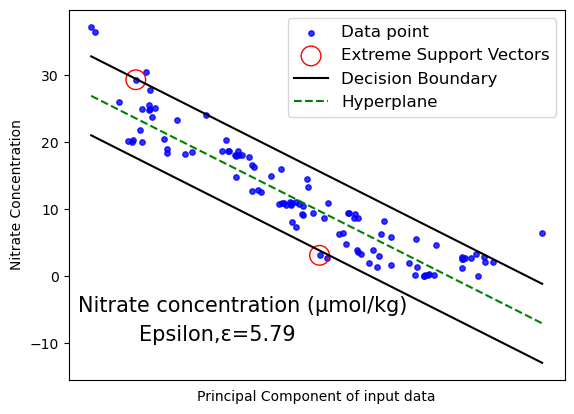

In [49]:
epsilon=5.9
pca = PCA(n_components=1)
a=random.randint(0,10000)
print(a)
train,test = train_test_split(val,
                            random_state=5314,
                            test_size=0.005,
                            train_size=0.01)
    
# predicting ph

# training data
x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
y_train=train['nitrate_mu_mol_kg_pow_minus_1']
#test data
x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
y_test=test['nitrate_mu_mol_kg_pow_minus_1']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)
y_test1=sc_y.fit_transform(y_test)



regressor=SVR(kernel='linear')
y_train1=y_train1.ravel()
x_train1=pca.fit_transform(x_train1)
x_test1=pca.fit_transform(x_test1)
regressor.fit(x_train1,y_train1)
sv_index=regressor.support_
x=x_train1[sv_index]
# print(len(x))


## support vector data
sv_index_x = pca.fit_transform(x)
sv_index_y=y_train1[sv_index]

sv_index_y=sc_y.inverse_transform(sv_index_y.reshape(-1,1))




## modified here
x_test1=sv_index_x
y_test1=sv_index_y


# prediction function and prediction data
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
ind=np.random.randint(0,x_test1.shape[0],size=30)
pred_x=x_test1[ind]
# pred_y=y_pred[ind]
pred_y=y_pred




## training data
ind=np.random.randint(0,x_train1.shape[0],size=40)
train_x=x_train1[ind]
train_y=y_train1[ind]







# plot 
# fig,ax = plt.subplots(1, 1,figsize=(8, 5.2))
# ax.scatter(y_test1, pred_y, cmap='K', edgecolor='b',linewidth='0.5',alpha=1, label='testing points',marker='o', s=12)


# ax.set_xlabel('Observed Area(km $^{2}$)',fontsize=14)
# ax.set_ylabel('Simulated Area(km $^{2}$)',fontsize=14)
# ax.set_xlim([min(y_test1)-100, max(y_test1)+100])
# plt.set_ylim([min(y_test1)-100, max(y_test1)+100])

# find support vectors
positive_instances=[]
negative_instances=[]

for i in range(x_test1.shape[0]):
    if  ((y_test1[i]-pred_y[i]>0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        positive_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]])
    elif ((y_test1[i]-pred_y[i]<0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        negative_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]]) 

# len(positive_instances)+len(negative_instances)

sort_positive=sorted([n for n in positive_instances])
sort_negative=sorted([n for n in negative_instances])


positive_support_vector=sort_positive[-1][1]
negative_support_vector=sort_negative[0][1]



model_support_vectors=np.stack((positive_support_vector,negative_support_vector),axis=-1)
# # visualize the data-set
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xticks([])
ax.set_ylabel("Nitrate Concentration")
ax.set_xlabel("Principal Component of input data")
plt.scatter(x_test1,y_test1,marker='o',c='b',s=15,alpha=0.8,label="Data point")

# # plot support vectors
ax.scatter(model_support_vectors[0, :],model_support_vectors[1, :],s=200, linewidth=1,facecolors='none', edgecolors='r', label="Extreme Support Vectors")




max_feature_value=np.amax(x_test1)
min_feature_value=np.amin(x_test1)
datarange = (min_feature_value*1.,max_feature_value*1.)
hyp_x_min = datarange[0]
hyp_x_max = datarange[1]




for i in range(x_test1.shape[0]):
    if(hyp_x_min==x_test1[i]):
        psv1=pred_y[i]+epsilon
        break


for i in range(x_test1.shape[0]):
    if(hyp_x_max==x_test1[i]):
        psv2=pred_y[i]+epsilon
        break
ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k',label="Decision Boundary")

# (w.x+b) = -epsilon
# negative support vector hyperplane
nsv1 = psv1-2*epsilon
nsv2 = psv2-2*epsilon
ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

# # (w.x+b) = 0
# # positive support vector hyperplane
db1 = psv1-epsilon
db2 = psv2-epsilon
ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'g--',linewidth=1.5,label="Hyperplane")
ax.text(0.35, 0.2, 'Nitrate concentration (μmol/kg)', ha='center', va='center', fontsize=15,transform=ax.transAxes)
ax.text(0.3, 0.12, 'Epsilon,ε=5.79', ha='center', va='center', fontsize=15,transform=ax.transAxes)
plt.legend(fontsize=12)
plt.show()

6599


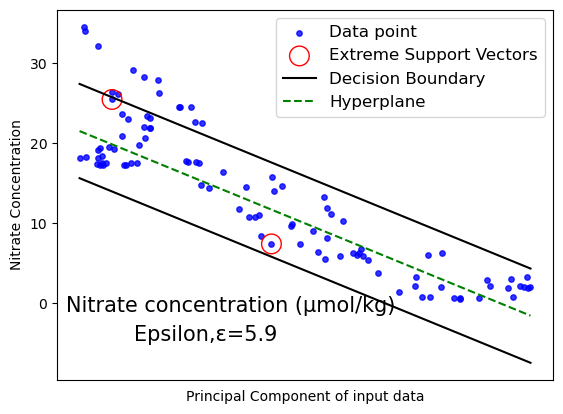

In [48]:
epsilon=5.9
pca = PCA(n_components=1)
a=random.randint(0,10000)
print(a)
train,test = train_test_split(val,
                            random_state=a,
                            test_size=0.005,
                            train_size=0.01)
    
# predicting ph

# training data
x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
y_train=train['nitrate_mu_mol_kg_pow_minus_1']
#test data
x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
y_test=test['nitrate_mu_mol_kg_pow_minus_1']


# converting target column on both test and training set into frame

y_test=y_test.to_frame()
y_train=y_train.to_frame()

# initiating the scaling instances

sc_x=StandardScaler()
sc_y=StandardScaler()

# fitting the training and testing data to the scaling instances
x_train1=sc_x.fit_transform(x_train)
y_train1=sc_y.fit_transform(y_train)
x_test1=sc_x.fit_transform(x_test)
y_test1=sc_y.fit_transform(y_test)



regressor=SVR(kernel='linear')
y_train1=y_train1.ravel()
x_train1=pca.fit_transform(x_train1)
x_test1=pca.fit_transform(x_test1)
regressor.fit(x_train1,y_train1)
sv_index=regressor.support_
x=x_train1[sv_index]
# print(len(x))


## support vector data
sv_index_x = pca.fit_transform(x)
sv_index_y=y_train1[sv_index]

sv_index_y=sc_y.inverse_transform(sv_index_y.reshape(-1,1))




## modified here
x_test1=sv_index_x
y_test1=sv_index_y


# prediction function and prediction data
y_pred=regressor.predict(x_test1)
y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
y_pred=sc_y.inverse_transform(y_pred)
ind=np.random.randint(0,x_test1.shape[0],size=30)
pred_x=x_test1[ind]
# pred_y=y_pred[ind]
pred_y=y_pred




## training data
ind=np.random.randint(0,x_train1.shape[0],size=40)
train_x=x_train1[ind]
train_y=y_train1[ind]







# plot 
# fig,ax = plt.subplots(1, 1,figsize=(8, 5.2))
# ax.scatter(y_test1, pred_y, cmap='K', edgecolor='b',linewidth='0.5',alpha=1, label='testing points',marker='o', s=12)


# ax.set_xlabel('Observed Area(km $^{2}$)',fontsize=14)
# ax.set_ylabel('Simulated Area(km $^{2}$)',fontsize=14)
# ax.set_xlim([min(y_test1)-100, max(y_test1)+100])
# plt.set_ylim([min(y_test1)-100, max(y_test1)+100])

# find support vectors
positive_instances=[]
negative_instances=[]

for i in range(x_test1.shape[0]):
    if  ((y_test1[i]-pred_y[i]>0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        positive_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]])
    elif ((y_test1[i]-pred_y[i]<0) and (y_test1[i]-pred_y[i]<=epsilon))==True:
        negative_instances.append([y_test1[i]-pred_y[i],[float(x_test1[i]),float(y_test1[i])]]) 

# len(positive_instances)+len(negative_instances)

sort_positive=sorted([n for n in positive_instances])
sort_negative=sorted([n for n in negative_instances])


positive_support_vector=sort_positive[-1][1]
negative_support_vector=sort_negative[0][1]



model_support_vectors=np.stack((positive_support_vector,negative_support_vector),axis=-1)
# # visualize the data-set
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.xticks([])
ax.set_ylabel("Nitrate Concentration")
ax.set_xlabel("Principal Component of input data")
plt.scatter(x_test1,y_test1,marker='o',c='b',s=15,alpha=0.8,label="Data point")

# # plot support vectors
ax.scatter(model_support_vectors[0, :],model_support_vectors[1, :],s=200, linewidth=1,facecolors='none', edgecolors='r', label="Extreme Support Vectors")




max_feature_value=np.amax(x_test1)
min_feature_value=np.amin(x_test1)
datarange = (min_feature_value*1.,max_feature_value*1.)
hyp_x_min = datarange[0]
hyp_x_max = datarange[1]




for i in range(x_test1.shape[0]):
    if(hyp_x_min==x_test1[i]):
        psv1=pred_y[i]+epsilon
        break


for i in range(x_test1.shape[0]):
    if(hyp_x_max==x_test1[i]):
        psv2=pred_y[i]+epsilon
        break
ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k',label="Decision Boundary")

# (w.x+b) = -epsilon
# negative support vector hyperplane
nsv1 = psv1-2*epsilon
nsv2 = psv2-2*epsilon
ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

# # (w.x+b) = 0
# # positive support vector hyperplane
db1 = psv1-epsilon
db2 = psv2-epsilon
ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'g--',linewidth=1.5,label="Hyperplane")
ax.text(0.35, 0.2, 'Nitrate concentration (μmol/kg)', ha='center', va='center', fontsize=15,transform=ax.transAxes)
ax.text(0.3, 0.12, 'Epsilon,ε=5.9', ha='center', va='center', fontsize=15,transform=ax.transAxes)
plt.legend(fontsize=12)
plt.show()

In [ ]:
## rbf with coefficient matrix multiplied in exponential power
## it's a custom kernel, custom build we need it!

def Kernel_matmul(U,V,sigma,c,mat):
    return np.exp((-1/(2*(sigma*sigma)))*np.sum(np.power(np.matmul((U-V),mat),c)))
def RBF_gram(U,V,sigma,c,mat):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_matmul(U[i],V[j],sigma,c,mat)
    return G

def RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat):
    RBF_matmul_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()
    RBF_matmul_regressor.fit(RBF_gram(x_train1,x_train1,sigma,c,mat),y_train1)
    y_pred=RBF_matmul_regressor.predict(RBF_gram(x_test1,x_train1,sigma,c,mat))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)


    # evaluating the model
    # mse
    # print("MSE:", mean_squared_error(y_test, y_pred))
    # RMSE
    # print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    # r2 score
    r2 = r2_score(y_test,y_pred)
    # print("r2 value: ",r2)
    # adjusted r2 score
    n=y_test.shape[0]
    k=x_train.shape[1]
    adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
    # print("adjusted r2 value: ",adj_r2_score)
    if(r2>0 and adj_r2_score>0):
        return y_pred
    else:
        return -1

In [ ]:
mat=np.array([list((val.corr()['nitrate_mu_mol_kg_pow_minus_1']).drop('nitrate_mu_mol_kg_pow_minus_1').values)]).T

sigma=float(input("paramter for sigma: "))
c=float(input("paramter for C: "))

while(True):   
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.03,
                                train_size=0.4)
        
    # predicting ph

    # training data
    x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_train=train['nitrate_mu_mol_kg_pow_minus_1']
    #test data
    x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_test=test['nitrate_mu_mol_kg_pow_minus_1']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)


    val1=RBF_matmul(x_train1,y_train1,x_test1,y_test,sigma,c,mat)
    if(val1[0]!=-1):
        y_pred_matmul=val1
        y_test_matmul=y_test
        break

In [ ]:
# sinh kernel with sigma multiplied and C added afterwards
# it's a custom kernel based on sinh

def Kernel_sinh(U,V,sigma,C):
    return math.sinh((sigma*np.dot(U,V))+C)
def sinh_kernel(U,V,sigma=0.1,C=0):
    G = np.zeros((U.shape[0], V.shape[0]))
    for i in range(0,U.shape[0]):
#         print(i)
        for j in range(0,V.shape[0]):
            G[i][j] = Kernel_sinh(U[i],V[j],sigma,C)
    return G


def sinh(x_train1,y_train1,x_test1,sigma,C):
    
    sinh_regressor=SVR(kernel = "precomputed")
    y_train1=y_train1.ravel()    
    sinh_regressor.fit(sinh_kernel(x_train1,x_train1,sigma,C),y_train1)
    y_pred=sinh_regressor.predict(sinh_kernel(x_test1,x_train1,sigma,C))
    y_pred=np.reshape(y_pred,(y_pred.shape[0],1))
    y_pred=sc_y.inverse_transform(y_pred)
    return y_pred

In [ ]:

sigma=float(input("paramter for sigma: "))
c=float(input("paramter for C: "))

while(True):   
    train,test = train_test_split(val,
                                random_state=random.randint(0,10000000),
                                test_size=0.03,
                                train_size=0.4)
        
    # predicting ph

    # training data
    x_train=train.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_train=train['nitrate_mu_mol_kg_pow_minus_1']
    #test data
    x_test=test.drop(['nitrate_mu_mol_kg_pow_minus_1'],axis=1)
    y_test=test['nitrate_mu_mol_kg_pow_minus_1']


    # converting target column on both test and training set into frame

    y_test=y_test.to_frame()
    y_train=y_train.to_frame()

    # initiating the scaling instances

    sc_x=StandardScaler()
    sc_y=StandardScaler()

    # fitting the training and testing data to the scaling instances
    x_train1=sc_x.fit_transform(x_train)
    y_train1=sc_y.fit_transform(y_train)
    x_test1=sc_x.fit_transform(x_test)


    val1=sinh(x_train1,y_train1,x_test1,sigma,c)
    if(val1[0]!=-1):
        y_pred_sine=val1
        y_test_sine=y_test
        break


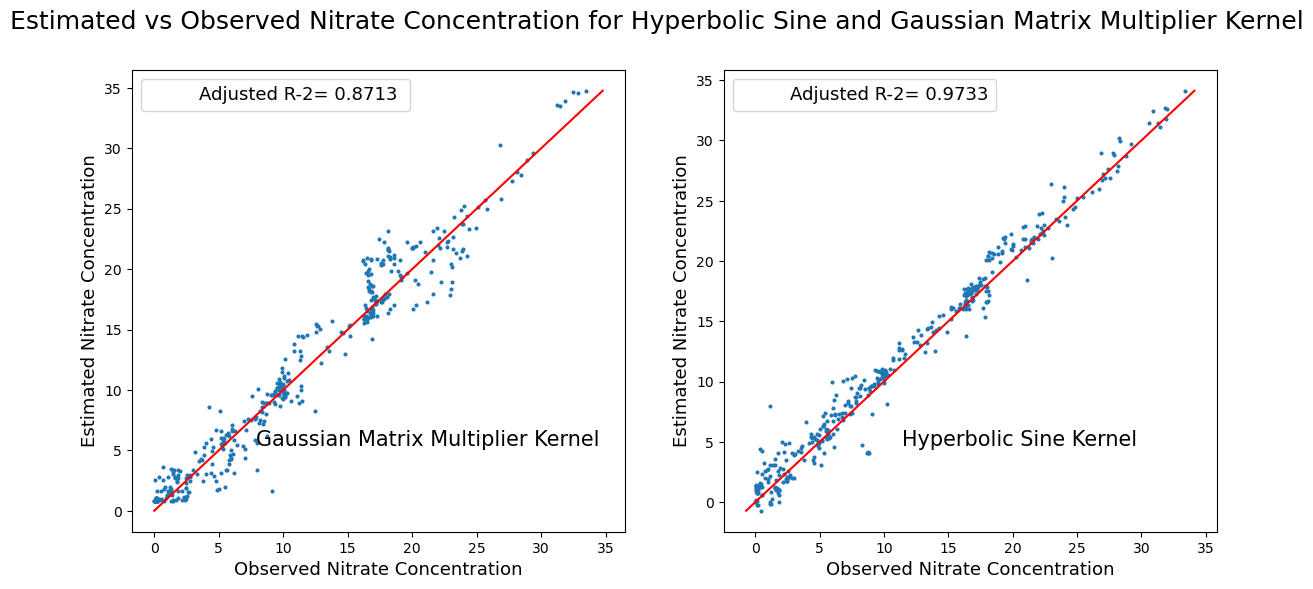

In [ ]:
# create a grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# plot the data and add text to each subplot
for i, ax in enumerate(axs):
    if i == 0:
        ax.scatter(list(y_test_matmul['nitrate_mu_mol_kg_pow_minus_1']),y_pred_matmul,s=15,marker='.')
        ax.plot([min(min(y_test_matmul['nitrate_mu_mol_kg_pow_minus_1']),float(min(y_pred_matmul))),max(max(y_test_matmul['nitrate_mu_mol_kg_pow_minus_1']),float(max(y_pred_matmul)))],
                [min(min(y_test_matmul['nitrate_mu_mol_kg_pow_minus_1']),float(min(y_pred_matmul))),max(max(y_test_matmul['nitrate_mu_mol_kg_pow_minus_1']),float(max(y_pred_matmul)))],
                color='r')
        ax.scatter([],[],label="Adjusted R-2= 0.8713 ",alpha=0)
        ax.set_xlabel("Observed Nitrate Concentration",fontsize=13)
        ax.set_ylabel("Estimated Nitrate Concentration",fontsize=13)
        ax.text(0.6, 0.2, 'Gaussian Matrix Multiplier', ha='center', va='center', fontsize=15,transform=ax.transAxes)

    elif i == 1:
        ax.scatter(list(y_test_sine['nitrate_mu_mol_kg_pow_minus_1']),y_pred_sine,s=15,marker='.')
        ax.plot([min(min(y_test_sine['nitrate_mu_mol_kg_pow_minus_1']),float(min(y_pred_sine))),max(max(y_test_sine['nitrate_mu_mol_kg_pow_minus_1']),float(max(y_pred_sine)))],
                [min(min(y_test_sine['nitrate_mu_mol_kg_pow_minus_1']),float(min(y_pred_sine))),max(max(y_test['nitrate_mu_mol_kg_pow_minus_1']),float(max(y_pred_sine)))],
                color='r')
        ax.scatter([],[],label="Adjusted R-2= 0.9733",alpha=0)
        ax.set_xlabel("Observed Nitrate Concentration",fontsize=13)
        ax.set_ylabel("Estimated Nitrate Concentration",fontsize=13)
        ax.text(0.6, 0.2, 'Hyperbolic Sine', ha='center', va='center', fontsize=15,transform=ax.transAxes)
    ax.legend(fontsize=13)


# plt.suptitle("Estimated vs Observed Nitrate Concentration for Hyperbolic Sine and Gaussian Matrix Multiplier Kernel",fontsize=18)
plt.show()


In [47]:
y_test_matmul['predict']=y_pred_matmul
y_test_matmul.to_csv('matmul_nitrate.csv',index=False)
y_test_sine['predict']=y_pred_sine
y_test_sine.to_csv('sine_nitrate.csv',index=False)